**Read Dataset**

In [ ]:
import csv
from random import randrange
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np
import pandas as pd

# Enter You Name Here
myname = "Aditi Bagora"

Read Dataset

In [ ]:
dataset = pd.read_csv('spam_1.data',delimiter=' ')
feature_set = dataset.iloc[:, :-1].values
label = dataset.iloc[:, -1].values


Test-Train Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_set, label, test_size = 0.30, random_state = 0)
dataset_train=np.column_stack((X_train,y_train))
dataset_test=np.column_stack((X_test,y_test))

**Class Node of decisionTree**

In [ ]:
class Node():
        def __init__(self, index=-1, value=-1, left=None, right=None, info_gain=-1, cvalue=None):
            ''' constructor '''
            # for decision node
            self.Index = index
            self.Value = value
            self.Left = left
            self.Right = right
            self.Left_subtree = left
            self.Right_subtree = right
            self.Info_gain = info_gain
            # for leaf node
            self.Cvalue = cvalue

Decision Tree Class from Assignment 1

In [ ]:
class DecisionTree():
        root = Node()
        min_samples_split = 0
        def learn(self, training_set, method):
              num_samples, num_features = np.shape(training_set)
              #if num_samples>=self.min_samples_split:
              node = self.get_split(training_set,method)
              # check if information gain is positive
              if node.Info_gain > 0:
                    node.Left_subtree = self.learn(node.Left, method)
                    node.Right_subtree = self.learn(node.Right, method)
                    return Node(node.Index, node.Value, node.Left_subtree,
                                node.Right_subtree, node.Info_gain, None)
              if node.Cvalue is None:
                 return Node(cvalue=self.Majority_Class_Label(training_set[:,num_features-1]))
              else:
                 return Node(cvalue=node.Cvalue)

            # implement this function
        def print_tree(self, tree=None, indent=" "):
            if tree is None:
                return
            if tree.Cvalue is not None:
                print(tree.Cvalue)
            else:
                print("X_" + str(tree.Index), "<=", tree.Value, "?", tree.Info_gain)
                print("%sleft:" % (indent), end="")
                self.print_tree(tree.Left_subtree, indent + indent)
                print("%sright:" % (indent), end="")
                self.print_tree(tree.Right_subtree, indent + indent)

        def classify(self, test_instance, tree):
           if tree is not None:
            if tree.Cvalue is not None:
                return tree.Cvalue
            feature_val = test_instance[tree.Index]
            if float(feature_val) <= float(tree.Value):
                return self.classify(test_instance, tree.Left_subtree)
            else:
                return self.classify(test_instance, tree.Right_subtree)

        def get_split(self, dataset,method):
            num_samples, num_features = np.shape(dataset)
            dataset_array=np.array([row for row in dataset])
            optimal_split = Node()
            max_gain = -float("inf")
            for feature_index in range(num_features-1):
                feature_values = dataset_array[:, feature_index]
                possible_values = np.unique(feature_values)
                for val in possible_values:
                    dataset_left = np.array([row for row in dataset if row[feature_index] <= val])
                    dataset_right = np.array([row for row in dataset if row[feature_index] > val])
                    # check if dataset are not null
                    parent = dataset_array[:, num_features - 1]
                    left_y=None
                    right_y=None
                    if len(dataset_left) > 0:
                          left_y = dataset_left[:, num_features - 1]
                    if len(dataset_right) > 0:
                          right_y = dataset_right[:, num_features - 1]
                        # Information gain
                    curr_gain, class_label = self.Information_Gain(parent, left_y, right_y, method)
                    # Find optimal split
                    if curr_gain >= max_gain:
                            optimal_split.Index = feature_index
                            optimal_split.Value = val
                            optimal_split.Left = dataset_left
                            optimal_split.Right = dataset_right
                            optimal_split.Info_gain = curr_gain
                            optimal_split.Cvalue = class_label
                            max_gain = curr_gain

            # return optimal split
            return optimal_split

        def Information_Gain(self, parent, l_child, r_child, method):
            ''' function to compute variance reduction '''
            probability_l=0
            probability_r=0
            if l_child is not None:
                      probability_l = len(l_child) / len(parent)
            if r_child is not None:
                      probability_r = len(r_child) / len(parent)

            if method == 'Entropy':
                EParent = self.Entropy(parent)
                Elchild = self.Entropy(l_child)
                Erchild = self.Entropy(r_child)
                Gain = EParent - (probability_l * Elchild + probability_r * Erchild)
                if l_child is not None and (Elchild == 0 or Elchild == 1):
                    class_label = l_child[0]
                elif r_child is not None and (Erchild == 0 or Erchild == 1):
                    class_label = r_child[0]
                else:
                    class_label = self.Majority_Class_Label(parent)
            else:
                GParent = self.GiniIndex(parent)
                Glchild = self.GiniIndex(l_child)
                Grchild = self.GiniIndex(r_child)
                Gain = GParent - (probability_l * Glchild + probability_r * Grchild)
                if Glchild == 0 or Glchild == 1:
                    class_label = l_child[0]
                elif Grchild == 0 or Grchild == 1:
                    class_label = r_child[0]
                else:
                    class_label = self.Majority_Class_Label(parent)
            return Gain, class_label

        def Majority_Class_Label(self, dataset_label):
             unique_class_label = np.unique(dataset_label)
             max_label_count=0
             for class_label in unique_class_label:
                class_label_count = len(dataset_label[dataset_label == class_label])
                if class_label_count > max_label_count:
                  max_label_count= class_label_count
                  max_label = class_label
             return max_label

        def Entropy(self, child):
            entropy = 0
            if child is not None:
              unique_class_label = np.unique(child)
              for class_label in unique_class_label:
                probability_class_label = len(child[child == class_label]) / len(child)
                entropy += (-probability_class_label * np.log2(probability_class_label))
            return entropy

        def GiniIndex(self, child):
            GiniIndex = 0
            unique_class_label = np.unique(child)
            for class_label in unique_class_label:
                probability_class_label = len(child[child == class_label]) / len(child)
                GiniIndex += probability_class_label * probability_class_label
            return 1 - GiniIndex

        def plot_accuracy(self, accuracy_plot):
           k=0
           for acc_list in  accuracy_plot:
               y1=list()
               for i in range(len(acc_list)):
                  y1.append(i+1)
               X_Y_Spline = make_interp_spline(y1, acc_list)
               X_ = np.linspace(1, 10, 500)
               Y_ = X_Y_Spline(X_)  
               if k==0:
                 label='Entropy'
               if k==1:
                 label='Gini Index'
               if k==2:
                 label='Pre Pruning'    
               k=k+1 
               plt.plot(X_, Y_, label=label)
           plt.xlabel('kth - fold')
           plt.ylabel('Accuracy')
           plt.title('Accuracy Plot ')
           plt.legend()
           plt.show()

        def plot_modelselection(self, accuracy_plot):
           y1=list()
           for i in range(len(accuracy_plot)):
                  y1.append(10*i)
           plt.plot(y1, accuracy_plot, label="Accuracy")
           plt.xlabel('kth - fold')
           plt.ylabel('Accuracy')
           plt.title('Accuracy Plot ')
           plt.legend()
           plt.show()

Sklearn Random Forest Classifier 

In [ ]:
def PreBuildRandomForest():
   from sklearn.ensemble import RandomForestClassifier
   print("Scikit Learn RFC")
   classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',oob_score=True, random_state = 123)
   classifier.fit(X_train, y_train)
   y_pred = classifier.predict(X_test)
   GetAccuracyandConfusionMatrix(y_pred,y_test)
   print("OOB score")
   print(classifier.oob_score_)

**Ensemble Random Forest**

In [ ]:
class EnsembleRandomForest:
   #features_per_tree=list()
   def __init__(self, num_features=3,num_trees=10, num_samples=None,dataset=None):
            ''' constructor '''
            # for decision node
            self.forest = list()
            self.predictions = list()
            self.oob_samples=list()
            self.num_features=num_features
            self.num_samples = num_samples
            self.num_trees=num_trees
            self.dataset=dataset
            self.features_per_tree = list()
            self.selected_samples=list()

   def GetTestInstanceFeatures(self,test_instance, i):
       samples,features=np.shape(self.dataset)
       for j in range(features-1, -1, -1):
           if j not in self.features_per_tree[i]:
               test_instance = np.delete(test_instance, obj=j)
       return test_instance

   def GetRandomSubsetOfTrainingSamples(self, dataset, features_prev=list()):
      selected_sample_indices=list()
      samples, features = np.shape(dataset)
      data_subset=np.empty((0,features), float)
      oob_set = np.empty((0, features), float)
      while len(selected_sample_indices) < samples:
          index=randrange(samples)
          selected_sample_indices.append(index)
          data_subset = np.append(data_subset, np.array([dataset[index]]), axis=0)

      for i in range(samples):
         if i not in selected_sample_indices:
             oob_set=np.append(oob_set,np.array([dataset[i]]),axis=0)

      feature_subset = list()
      while len(feature_subset) < self.num_features:
          index=randrange(features-1)
          if index not in feature_subset:
              feature_subset.append(index)

      feature_subset.sort(reverse=True)
      for i in range(features-2,-1,-1):
        if i not in feature_subset:
          data_subset=np.delete(data_subset,obj=i,axis=1)
          oob_set = np.delete(oob_set, obj=i, axis=1)

      self.oob_samples.append(oob_set)
      return data_subset,feature_subset,selected_sample_indices


   def CreateForestOfLearnedTrees(self):
      self.features_per_tree.clear()
      for i in range(self.num_trees):
         random_training_set,feature_list,selected_sample_list=self.GetRandomSubsetOfTrainingSamples(dataset_train,list())
         self.features_per_tree.append(feature_list)
         self.selected_samples.append(selected_sample_list)
         tree=DecisionTree()
         tree.root=tree.learn(random_training_set,'Entropy')
         self.forest.append(tree)

   def Test_Model(self,model, test_set) :
        result = model.classify(test_set, model.root)
        return result

   def GetOOBSamplesIndicesForTree(self,tree_index):
     dataset_set=set()
     for i in range(np.shape(dataset)[0]):
       dataset_set.add(i)
     sample_subset=set(self.selected_samples[tree_index])
     oob_subset=dataset_set.difference(sample_subset)
     for i in oob_subset:
       if i > np.shape(dataset)[0]-1:
          print(dataset_set)
          print(sample_subset)
          print(oob_subset)
          print(tree_index)
     return oob_subset

   def GetTreeIndexForOOBSample(self,sample_index) : 
      predictors=list()
      for i in range(len(self.forest)):
        if sample_index in self.GetOOBSamplesIndicesForTree(i):
          predictors.append(i)
      return predictors  

   def GetMajorityVoteFromTrees(self,predictors,sample_index):
      predictions=list()
      for i in predictors:
        test_instance=self.GetTestInstanceFeatures(dataset_train[sample_index,:],i)
        prediction = self.Test_Model(self.forest[i],test_instance)
        predictions.append(prediction)
        result=0
        if predictions.count(1)>predictions.count(0):
           result=1
      return result     

   def AddSampleIndex(self,j):
      for i in self.GetTreeIndexForOOBSample(j):
        self.selected_samples[i].append(j)

   def TestOOBApproach2(self):
     accuracy=list()
     for i in range(len(self.forest)):
       oob_samples=self.GetOOBSamplesIndicesForTree(i)
       for j in oob_samples:
         if j < np.shape(dataset_train)[0]:
          result=self.GetMajorityVoteFromTrees(self.GetTreeIndexForOOBSample(j),j)   
          accuracy.append(result == dataset_train[j,57])
          self.AddSampleIndex(j)
     return accuracy.count(True)/len(accuracy)    

   def Test_RandomForest(self):
     i=0
     accuracy=list()
     predictions=list()
     s,f=np.shape(dataset_test)
     for j in range(s):
        predictions.clear()
        for i in range(len(self.forest)):
          prediction=self.Test_Model(self.forest[i],self.GetTestInstanceFeatures(dataset_test[j,:],i))
          predictions.append(prediction)
          #i=i+1
        result=0
        if predictions.count(1)>predictions.count(0):
           result=1
        self.predictions.append(result)
        accuracy.append(result == dataset_test[j,f-1])
     return accuracy.count(True)/len(accuracy)

   def Test_RandomForestonOOBSamples(self):
       accuracy=list()
       for i in range(len(self.forest)):
           c=0
           k=0
           for oob_sample in self.oob_samples[i]:
               prediction=self.forest[i].classify(oob_sample,self.forest[i].root)
               if prediction is  not None:
                   k=k+1
                   if prediction == oob_sample[-1]:
                      c=c+1
           accuracy.append(c/k)
       return sum(accuracy)/len(accuracy)

Return sensitivity and print accuracy

In [ ]:
def GetAccuracyandConfusionMatrix(y_test,y_pred):
    from sklearn.metrics import confusion_matrix, accuracy_score
    cm = confusion_matrix(y_test, y_pred)
    print("Accuracy")
    print(accuracy_score(y_test, y_pred))
    return accuracy_score(y_test, y_pred),cm[0,0]/(cm[0,0]+cm[1,0])

Plot sensitivity graph

In [ ]:
def plot_modelselection(accuracy_plot,sensitivity,oob_error):
         y1 = list()
         f_min=2*int(np.sqrt(np.shape(dataset)[1]))-4
         f_max=f_min+9
         for i in range(f_min,f_max,2):
           y1.append(f_min + i)
         plt.plot(y1, accuracy_plot, label="Error")
         #plt.plot(y1, sensitivity, label="Sensitivity")
         plt.plot(y1, oob_error, label="OOB_error")
         plt.xlabel('Num of features')
         # plt.ylabel('Sensitivity')
         #plt.title('Sensitivity Plot')
         plt.legend()
         plt.show()

In [ ]:
def plot_sensitivity(accuracy_plot,sensitivity):
         y1 = list()
         f_min=2*int(np.sqrt(np.shape(dataset)[1]))-4
         f_max=f_min+9
         for i in range(f_min,f_max,2):
           y1.append(f_min + i)
         plt.plot(y1, accuracy_plot, label="Accuracy")
         plt.plot(y1, sensitivity, label="Sensitivity")
         #plt.plot(y1, oob_error, label="OOB_error")
         plt.xlabel('Num of features')
         # plt.ylabel('Sensitivity')
         #plt.title('Sensitivity Plot')
         plt.legend()
         plt.show()

Build Random Forest Classifier

In [ ]:
def BuildRandomForest(num_trees,num_features):
     samples,f=np.shape(dataset)
     random = EnsembleRandomForest(num_trees=num_trees,num_samples=samples,num_features=num_features,dataset=dataset)
     print("Building Forest...")

     random.CreateForestOfLearnedTrees()
     print("Making Predictions...")
     accuracy = random.Test_RandomForest()
      
     print("OOB Score")
     oob_score=random.TestOOBApproach2()
     #print(random.Test_RandomForestonOOBSamples())
     print(oob_score)
     
     accuracy,sensitivity=GetAccuracyandConfusionMatrix(y_test, random.predictions)
     return accuracy,sensitivity,oob_score


Learn RFC for different values of num_features

In [ ]:
def ExploreSensitivityOfRandomForestwrtm():
   error=list()
   accu=list()
   sensitivities=list()
   oob_error=list()
   i=0
   m= 2*int(np.sqrt(np.shape(dataset)[1]))-4
   while m + i <= 2*int(np.sqrt(np.shape(dataset)[1])) + 4:
     acc,sensitivity,oob_score= BuildRandomForest(num_trees=5,num_features=m+i)
     error.append(1-acc)
     accu.append(acc)
     sensitivities.append(sensitivity)
     oob_error.append((1-oob_score))
     i=i+2
   plot_modelselection(error,sensitivities,oob_error) 
   plot_sensitivity(accu,sensitivities)

Basic Random Forest Classifier with oob score computation keeping num_features sqrt(n)/2 ,sqrt(n),2*sqrt(n)

In [ ]:
features = int(np.sqrt(np.shape(dataset)[1]))
BuildRandomForest(num_trees=9,num_features=features/2)
BuildRandomForest(num_trees=9,num_features=features)
BuildRandomForest(num_trees=9,num_features=2*features)

Building Forest...
Making Predictions...
OOB Score
0.7393364928909952
Accuracy
0.7557971014492754
Building Forest...
Making Predictions...
OOB Score
0.841624685138539
Accuracy
0.8847826086956522
Building Forest...
Making Predictions...
OOB Score
0.8521684077239633
Accuracy
0.9260869565217391


(0.9260869565217391, 0.910958904109589, 0.8521684077239633)

In [ ]:
PreBuildRandomForest()

Scikit Learn RFC
Accuracy
0.9492753623188406
OOB score
0.9211180124223602


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [ ]:
BuildRandomForest(num_trees=10,num_features=26)

Building Forest...
Making Predictions...
OOB Score
0.9139987445072191
Accuracy
0.9492753623188406


(0.9492753623188406, 0.9433962264150944, 0.9139987445072191)

In [ ]:
BuildRandomForest(num_trees=5,num_features=21)

Building Forest...
Making Predictions...
OOB Score
0.8801524073432629
Accuracy
0.9231884057971015


(0.9231884057971015, 0.9172494172494172, 0.8801524073432629)

It can clearly be seen that Accuracy and oob_score incresed for values 2*sqrt(n) hence taking a range of m as (2*sqrt(n)-4,2*sqrt(n)+4) for plotting oob_score 

Building Forest...
Making Predictions...
OOB Score
0.8422506040731792
Accuracy
0.9057971014492754
Building Forest...
Making Predictions...
OOB Score
0.8617241379310345
Accuracy
0.9166666666666666
Building Forest...
Making Predictions...
OOB Score
0.8564527260179434
Accuracy
0.9188405797101449
Building Forest...
Making Predictions...
OOB Score
0.8638707459608113
Accuracy
0.922463768115942
Building Forest...
Making Predictions...
OOB Score
0.8423050379572119
Accuracy
0.9173913043478261


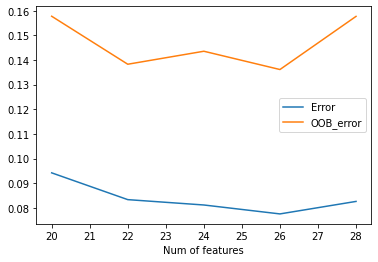

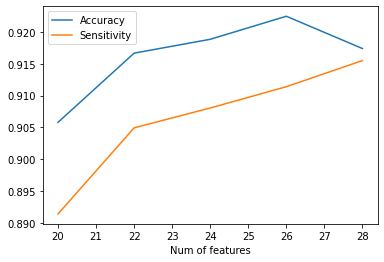

In [ ]:
ExploreSensitivityOfRandomForestwrtm()